In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Menyamakan ukuran dan mengubah gambar ke bentuk biner**

In [ ]:
!pip install opencv-python
import os
import cv2

# Folder input dan output di Google Drive
input_folder = '/content/drive/MyDrive/Machine Learning/RBL/COBA/sem_images'
output_folder = '/content/drive/MyDrive/Machine Learning/RBL/COBA/sem_images_result'

# Pastikan folder output ada
os.makedirs(output_folder, exist_ok=True)

# Ukuran target untuk resize (misalnya 256x256)
target_size = (256, 256)  # Format: (width, height)

# Proses setiap file PNG di folder input
for filename in os.listdir(input_folder):
    if filename.lower().endswith(".png"):
        input_path = os.path.join(input_folder, filename)

        # Baca gambar dalam grayscale
        image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"Gagal membaca gambar: {filename}")
            continue

        # Resize gambar ke ukuran target
        resized_image = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)

        # Ubah ke citra biner menggunakan Otsu threshold
        _, binary_image = cv2.threshold(resized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Buat nama file baru
        base_name = os.path.splitext(filename)[0]
        output_filename = f"{base_name}_Result.png"
        output_path = os.path.join(output_folder, output_filename)

        # Simpan gambar biner
        cv2.imwrite(output_path, binary_image)

        print(f"Processed: {filename} → {output_filename}")

print("Semua gambar telah diproses, di-resize, dan disimpan di folder sem_images_result.")


Processed: 19SEM.png → 19SEM_Result.png
Processed: 18SEM.png → 18SEM_Result.png
Processed: 15SEM.png → 15SEM_Result.png
Processed: 16SEM.png → 16SEM_Result.png
Processed: 17SEM.png → 17SEM_Result.png
Processed: 13SEM.png → 13SEM_Result.png
Processed: 14SEM.png → 14SEM_Result.png
Processed: 12SEM.png → 12SEM_Result.png
Processed: 11SEM.png → 11SEM_Result.png
Processed: 10SEM.png → 10SEM_Result.png
Processed: 3SEM.png → 3SEM_Result.png
Processed: 40SEM.png → 40SEM_Result.png
Processed: 41SEM.png → 41SEM_Result.png
Processed: 39SEM.png → 39SEM_Result.png
Processed: 21SEM.png → 21SEM_Result.png
Processed: 22SEM.png → 22SEM_Result.png
Processed: 29SEM.png → 29SEM_Result.png
Processed: 27SEM.png → 27SEM_Result.png
Processed: 24SEM.png → 24SEM_Result.png
Processed: 25SEM.png → 25SEM_Result.png
Processed: 28SEM.png → 28SEM_Result.png
Processed: 26SEM.png → 26SEM_Result.png
Processed: 38SEM.png → 38SEM_Result.png
Processed: 37SEM.png → 37SEM_Result.png
Processed: 36SEM.png → 36SEM_Result.png
Pr

# **2. Embedding untuk mengekstrak fitur**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install dependencies
!pip install tensorflow opencv-python

import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm

from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model

# Path folder hasil gambar
input_folder = '/content/drive/MyDrive/Machine Learning/RBL/COBA/sem_images_result'

# Load pre-trained InceptionV3 model (tanpa top/classification layer)
base_model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')  # Output: 2048-dim

# List untuk menyimpan data
feature_list = []
file_names = []

# Target size untuk InceptionV3
iv3_target_size = (299, 299)  # width x height

# Loop semua gambar hasil
for filename in tqdm(sorted(os.listdir(input_folder))):
    if filename.lower().endswith(".png") and '_Result' in filename:
        path = os.path.join(input_folder, filename)

        # Baca gambar dan konversi ke RGB
        image = cv2.imread(path)
        if image is None:
            print(f"Skipped (failed read): {filename}")
            continue

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, iv3_target_size)
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        image = preprocess_input(image)

        # Ekstraksi fitur
        features = base_model.predict(image)
        features = features.flatten()  # Ubah jadi 1D array

        # Simpan fitur
        feature_list.append(features)
        file_names.append(filename)

# Konversi ke DataFrame
features_df = pd.DataFrame(feature_list)
features_df.insert(0, "filename", file_names)

# Simpan sebagai CSV
features_df.to_csv('/content/drive/MyDrive/Machine Learning/RBL/COBA/features.csv', index=False)

print("Embedding selesai. Fitur disimpan sebagai features.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


  0%|          | 0/60 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  2%|▏         | 1/60 [00:03<03:23,  3.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


  3%|▎         | 2/60 [00:03<01:35,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


  5%|▌         | 3/60 [00:04<01:00,  1.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


  7%|▋         | 4/60 [00:04<00:44,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


  8%|▊         | 5/60 [00:04<00:34,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 10%|█         | 6/60 [00:05<00:29,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 12%|█▏        | 7/60 [00:05<00:26,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 13%|█▎        | 8/60 [00:06<00:29,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


 15%|█▌        | 9/60 [00:07<00:31,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 17%|█▋        | 10/60 [00:07<00:33,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


 18%|█▊        | 11/60 [00:08<00:33,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


 20%|██        | 12/60 [00:09<00:33,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 22%|██▏       | 13/60 [00:10<00:33,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 23%|██▎       | 14/60 [00:10<00:27,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 25%|██▌       | 15/60 [00:10<00:23,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 27%|██▋       | 16/60 [00:11<00:21,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 28%|██▊       | 17/60 [00:11<00:19,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 30%|███       | 18/60 [00:11<00:18,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 32%|███▏      | 19/60 [00:12<00:17,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 33%|███▎      | 20/60 [00:12<00:16,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 35%|███▌      | 21/60 [00:13<00:15,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 37%|███▋      | 22/60 [00:13<00:14,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 38%|███▊      | 23/60 [00:13<00:14,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 40%|████      | 24/60 [00:14<00:13,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 42%|████▏     | 25/60 [00:14<00:13,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 43%|████▎     | 26/60 [00:14<00:12,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 45%|████▌     | 27/60 [00:15<00:12,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 47%|████▋     | 28/60 [00:15<00:12,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 48%|████▊     | 29/60 [00:16<00:11,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 50%|█████     | 30/60 [00:16<00:10,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 52%|█████▏    | 31/60 [00:16<00:10,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 53%|█████▎    | 32/60 [00:17<00:09,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 55%|█████▌    | 33/60 [00:17<00:09,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 57%|█████▋    | 34/60 [00:17<00:09,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 58%|█████▊    | 35/60 [00:18<00:09,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 60%|██████    | 36/60 [00:18<00:08,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 62%|██████▏   | 37/60 [00:19<00:08,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 63%|██████▎   | 38/60 [00:19<00:07,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 65%|██████▌   | 39/60 [00:19<00:07,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


 67%|██████▋   | 40/60 [00:20<00:09,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 68%|██████▊   | 41/60 [00:21<00:10,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 70%|███████   | 42/60 [00:21<00:10,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 72%|███████▏  | 43/60 [00:22<00:10,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


 73%|███████▎  | 44/60 [00:23<00:10,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 75%|███████▌  | 45/60 [00:23<00:08,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 77%|███████▋  | 46/60 [00:24<00:07,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 78%|███████▊  | 47/60 [00:24<00:06,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 80%|████████  | 48/60 [00:24<00:05,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 82%|████████▏ | 49/60 [00:25<00:04,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 83%|████████▎ | 50/60 [00:25<00:04,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 85%|████████▌ | 51/60 [00:25<00:03,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 87%|████████▋ | 52/60 [00:26<00:03,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 88%|████████▊ | 53/60 [00:26<00:02,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 90%|█████████ | 54/60 [00:27<00:02,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 92%|█████████▏| 55/60 [00:27<00:01,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 93%|█████████▎| 56/60 [00:27<00:01,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 95%|█████████▌| 57/60 [00:28<00:01,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 97%|█████████▋| 58/60 [00:28<00:00,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 98%|█████████▊| 59/60 [00:28<00:00,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


100%|██████████| 60/60 [00:29<00:00,  2.05it/s]


Embedding selesai. Fitur disimpan sebagai features.csv


# **3. Melakukan PCA untuk mengurangi dimensi fitur**

Jumlah komponen untuk mencapai ≥90% variasi: 32


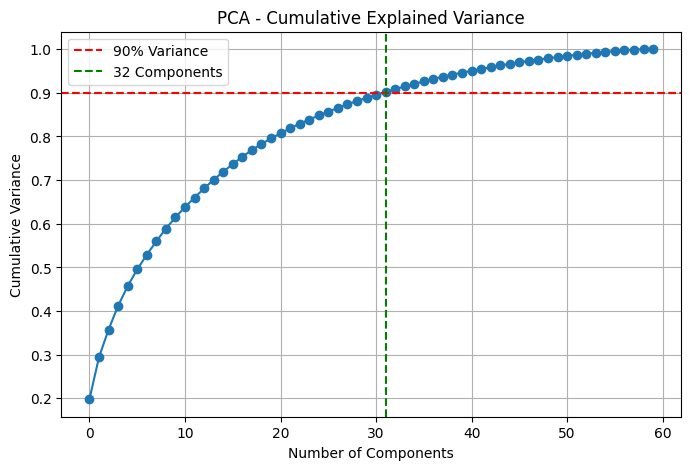

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data fitur (hasil embedding dari InceptionV3)
features_df = pd.read_csv('/content/drive/MyDrive/Machine Learning/RBL/COBA/features.csv')

# Pisahkan nama file dan fitur
file_names = features_df['filename']
X = features_df.drop(columns=['filename']).values  # Hanya fitur (2048 dimensi)

# Standardisasi data (PCA sensitif terhadap skala)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lakukan PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Hitung variasi kumulatif
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Cari jumlah komponen yang menyumbang ≥ 90% variasi
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Jumlah komponen untuk mencapai ≥90% variasi: {n_components_90}")

# Transformasi ke dimensi baru dengan n_components_90
pca_90 = PCA(n_components=n_components_90)
X_pca_90 = pca_90.fit_transform(X_scaled)

# Buat DataFrame hasil PCA
pca_df = pd.DataFrame(X_pca_90)
pca_df.insert(0, "filename", file_names)

# Simpan hasil PCA ke CSV
pca_df.to_csv('/content/drive/MyDrive/Machine Learning/RBL/COBA/features_pca.csv', index=False)

# (Opsional) Plot variasi kumulatif
plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
plt.axvline(x=n_components_90-1, color='g', linestyle='--', label=f'{n_components_90} Components')
plt.title('PCA - Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.legend()
plt.grid(True)
plt.show()


# **4. Menyatukan dengan kolom target**

In [ ]:
import pandas as pd

# 1. Nilai target Average_D dari gambar
average_d = [
    410, 80, 160, 394, 582, 490, 274, 330, 399, 581,
    228, 109, 500, 405, 383, 462, 217, 144, 136, 128,
    393, 568, 658, 150, 135, 240, 306, 292, 407, 1400,
    618, 375, 488, 267, 257, 196, 300, 223, 235, 412,
    387, 381, 405, 410, 438, 500, 350, 912, 400, 977,
    380, 297, 294, 250, 490, 432, 240, 490, 512, 516
]

# 2. Baca hasil PCA
pca_df = pd.read_csv('/content/drive/MyDrive/Machine Learning/RBL/COBA/features_pca.csv')

# 3. Periksa apakah jumlah baris sama
assert len(pca_df) == len(average_d), "Jumlah data PCA dan target Average_D tidak sama!"

# 4. Tambahkan kolom Average_D
pca_df['Average_D'] = average_d

# 5. Simpan sebagai file baru
pca_df.to_csv('/content/drive/MyDrive/Machine Learning/RBL/COBA/features_target.csv', index=False)

print("Berhasil digabung! Disimpan sebagai 'sem_image_features_pca90_with_target.csv'")


Berhasil digabung! Disimpan sebagai 'sem_image_features_pca90_with_target.csv'


# **5. Random Forest**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
📊 Hasil Evaluasi Model:
1. RMSE: 23.07
2. R² Score: 0.91
3. MAE: 21.36
4. MAPE: 5.30%


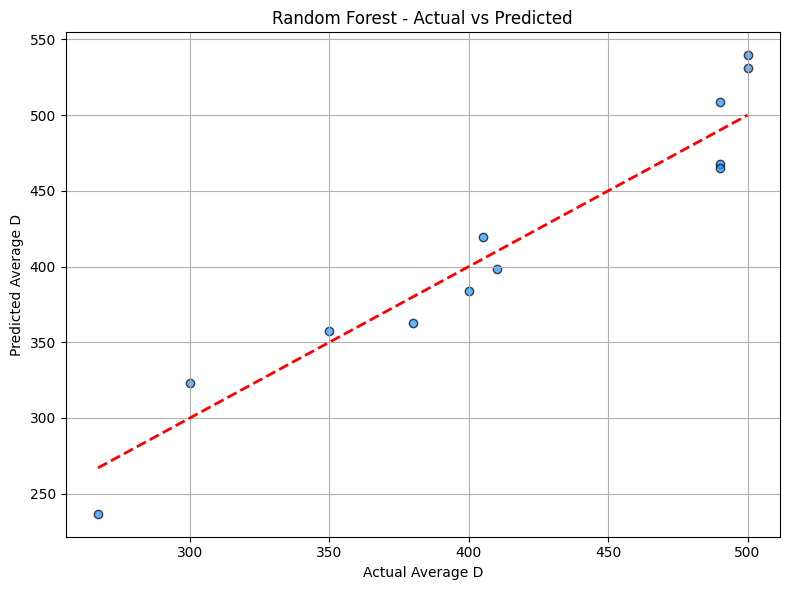

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import joblib

# 1. Load data
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/RBL/COBA/features_target.csv')

# 2. Pisahkan fitur dan target
X = data.drop(columns=['filename', 'Average_D'])
y = data['Average_D']

# 3. Bagi data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Standardisasi (optional untuk RF)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Random Forest dengan hyperparameter tuning
rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

random_search.fit(X_train_scaled, y_train)

# 6. Evaluasi model terbaik
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE dalam persen

print("📊 Hasil Evaluasi Model:")
print(f"1. RMSE: {rmse:.2f}")
print(f"2. R² Score: {r2:.2f}")
print(f"3. MAE: {mae:.2f}")
print(f"4. MAPE: {mape:.2f}%")

# 7. Visualisasi: Plot nilai aktual vs prediksi
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='dodgerblue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Average D')
plt.ylabel('Predicted Average D')
plt.title('Random Forest - Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

# **5.1 Menyimpan model RF**

In [ ]:
joblib.dump(best_rf, '/content/drive/MyDrive/Machine Learning/RBL/COBA/best_rf_model.pkl')
joblib.dump(scaler, '/content/drive/MyDrive/Machine Learning/RBL/COBA/scaler_rf.pkl')

['/content/drive/MyDrive/Machine Learning/RBL/COBA/scaler_rf.pkl']

# **6. XGBoost**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
📊 Hasil Evaluasi Model:
1. RMSE: 30.37
2. R² Score: 0.94
3. MAE: 23.56
4. MAPE: 4.99%


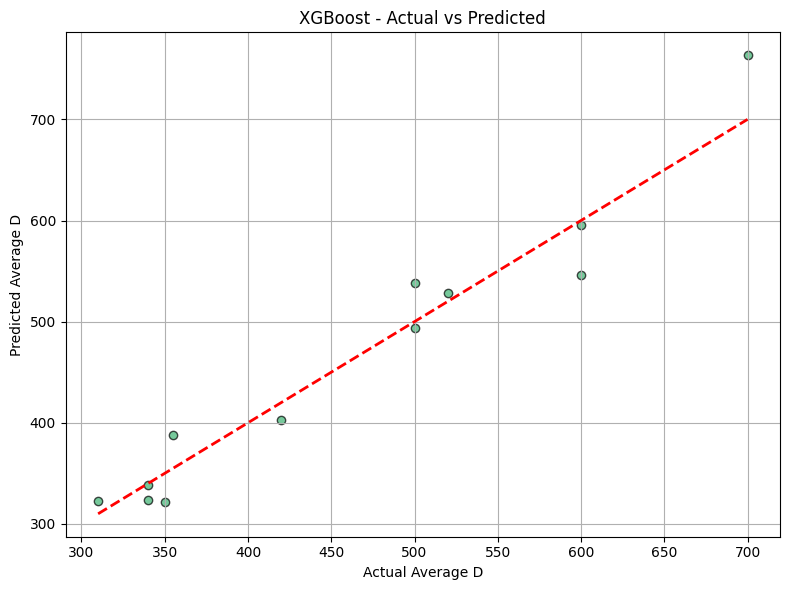

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# 1. Load data
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/RBL/COBA/Features_Target.csv')

# 2. Pisahkan fitur dan target
X = data.drop(columns=['filename', 'Average_D'])
y = data['Average_D']

# 3. Bagi data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Standardisasi fitur (meskipun XGBoost tidak wajib, tetap dilakukan untuk konsistensi)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. XGBoost dengan hyperparameter tuning
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

random_search.fit(X_train_scaled, y_train)

# 6. Evaluasi model terbaik
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE dalam persen

print("📊 Hasil Evaluasi Model:")
print(f"1. RMSE: {rmse:.2f}")
print(f"2. R² Score: {r2:.2f}")
print(f"3. MAE: {mae:.2f}")
print(f"4. MAPE: {mape:.2f}%")

# 7. Visualisasi: Plot nilai aktual vs prediksi
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='mediumseagreen', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Average D')
plt.ylabel('Predicted Average D')
plt.title('XGBoost - Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()


# **6.1 Menyimpan model XGBoost**

In [ ]:
joblib.dump(best_xgb, '/content/drive/MyDrive/Machine Learning/RBL/COBA/best_xgb_model.pkl')
joblib.dump(scaler, '/content/drive/MyDrive/Machine Learning/RBL/COBA/scaler_xgb.pkl')

['/content/drive/MyDrive/Machine Learning/RBL/COBA/scaler_xgb.pkl']

# **7. Linier Regression**

📊 Hasil Evaluasi Model:
1. RMSE: 64.86
2. R² Score: 0.98
3. MAE: 39.06
4. MAPE: 9.31%


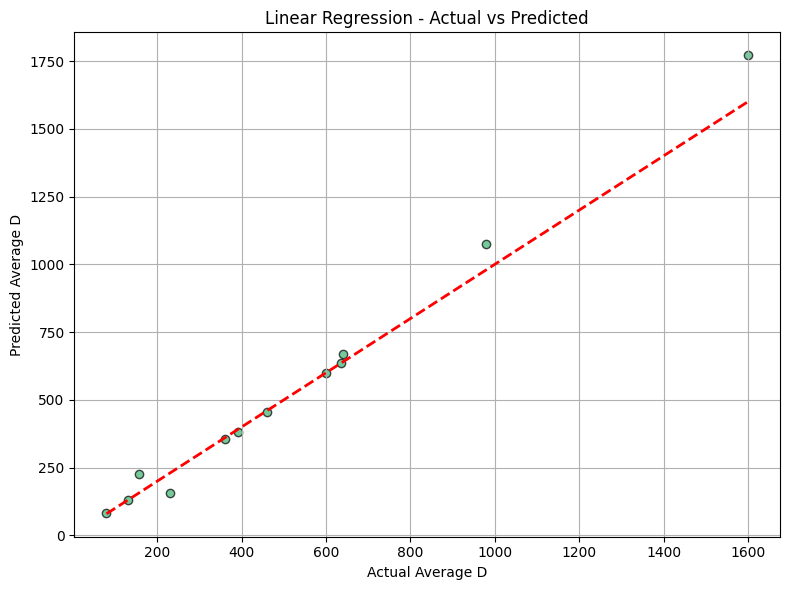

 Actual Predicted
 360.00    356.82
 980.00   1076.62
 156.00    227.41
 460.00    454.87
 600.00    598.07
 130.00    129.70
  80.00     82.19
 392.00    381.20
1600.00   1771.35
 636.00    635.34
 230.00    155.17
 640.00    670.31


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# 1. Load data
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/RBL/COBA/Features_target.csv')

# 2. Pisahkan fitur dan target
X = data.drop(columns=['filename','Average_D'])
y = data['Average_D']

# 3. Bagi data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# 6. Evaluasi model
y_pred = lr.predict(X_test_scaled)

# Hitung metrik
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE dalam persen

print("📊 Hasil Evaluasi Model:")
print(f"1. RMSE: {rmse:.2f}")
print(f"2. R² Score: {r2:.2f}")
print(f"3. MAE: {mae:.2f}")
print(f"4. MAPE: {mape:.2f}%")

# 7. Visualisasi
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='mediumseagreen', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Average D')
plt.ylabel('Predicted Average D')
plt.title('Linear Regression - Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Tampilkan hasil prediksi vs aktual
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
})

print(results_df.head(12).to_string(
    index=False,
    formatters={
        'Actual': '{:.2f}'.format,
        'Predicted': '{:.2f}'.format,
    }
))

# **7.1 Menyimpan model Linier Regression**

In [ ]:
# 9. Simpan model dan scaler
model_path = '/content/drive/MyDrive/Machine Learning/RBL/COBA/linear_regression_model'
scaler_path = '/content/drive/MyDrive/Machine Learning/RBL/COBA/scaler_linier'

# Simpan model
joblib.dump(lr, model_path)
# Simpan scaler
joblib.dump(scaler, scaler_path)

['/content/drive/MyDrive/Machine Learning/RBL/COBA/scaler_linier']